In [ ]:
import zipfile
import os

# Path to the downloaded ZIP file
zip_file_path = "SAS.zip"
extraction_path = "dataset/"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Extraction completed. Files are now in the 'dataset/' folder.")

In [18]:
import cv2

# Load the image
image_path = 'dataset/SAS/image20.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Image not found at path {image_path}")
else:
    # Convert the image to RGB (OpenCV loads images in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [19]:
from sklearn.cluster import KMeans
import numpy as np

# Resize the image for consistent processing
image = cv2.resize(image, (400, 400))  # Resize to 400x400 for simplicity
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Flatten the image for clustering
pixels = image.reshape((-1, 3))

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)
labels = kmeans.labels_

# Step 4: Reshape the labels back to image dimensions
height, width = image.shape[:2]
predicted_image = labels.reshape((height, width))

# Get the cluster labels for each pixel
labels = kmeans.labels_

In [20]:
# Step 4: Create the dataset for training
# X (features): RGB values of each pixel
# y (labels): 1 for Concrete, 0 for Green
X = pixels
y = np.where(labels == 0, 1, 0)  # Label '0' as Concrete (1) and '1' as Green (0)

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Step 6: Train a classifier (e.g., Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import classification_report

# Step 7: Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2110
           1       1.00      1.00      1.00     29890

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000



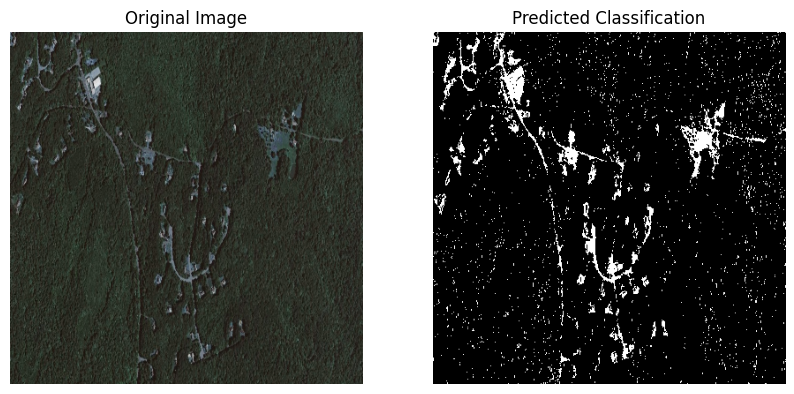

In [24]:
# Step 5: Visualize the Results
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the classification result (Concrete vs Green)
plt.subplot(1, 2, 2)
plt.imshow(predicted_image, cmap='gray')  # 'gray' colormap for binary clusters
plt.title("Predicted Classification")
plt.axis('off')

plt.show()

In [25]:
# Step 9: Calculate the area of concrete (percentage)
concrete_area_percentage = np.sum(predicted_image == 1) / predicted_image.size * 100
print(f"Concrete Area Percentage: {concrete_area_percentage:.2f}%")

Concrete Area Percentage: 6.39%
